In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

In [2]:
def diff_smooth(x, n):
    a = np.zeros_like(x)
    for i in range(len(x)-n):
        i += n
        a[i] = np.nanmean(x[i:i+n], axis=0) - np.nanmean(x[i-n:i], axis=0)
    return a

In [3]:
candidates = ['sanders', 'clinton', 'cruz', 'trump']

/home/jeroen/anaconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


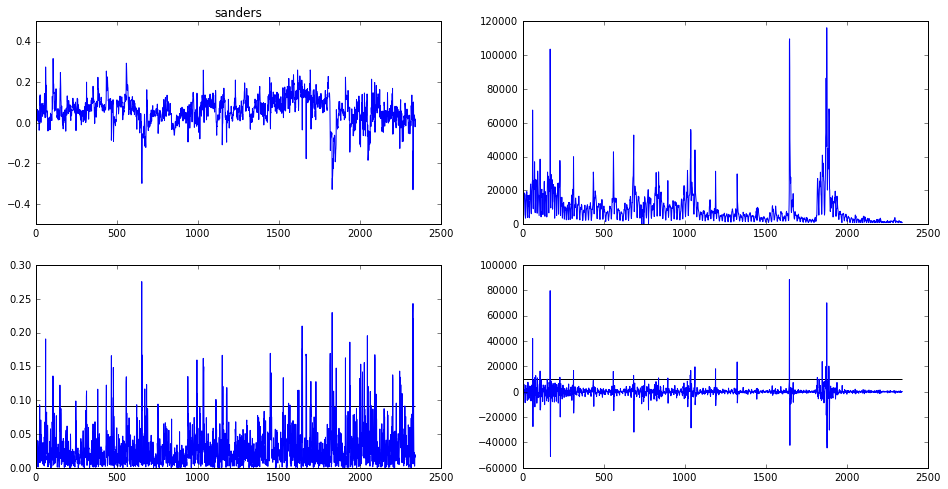

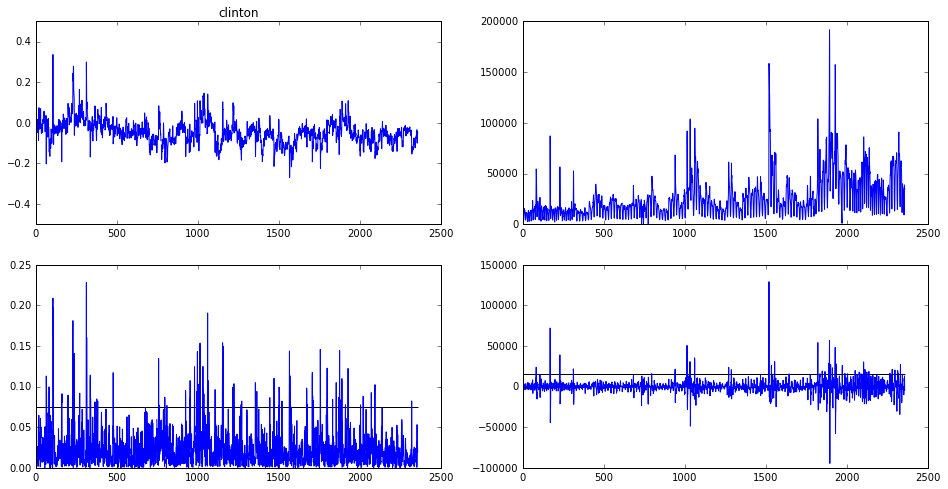

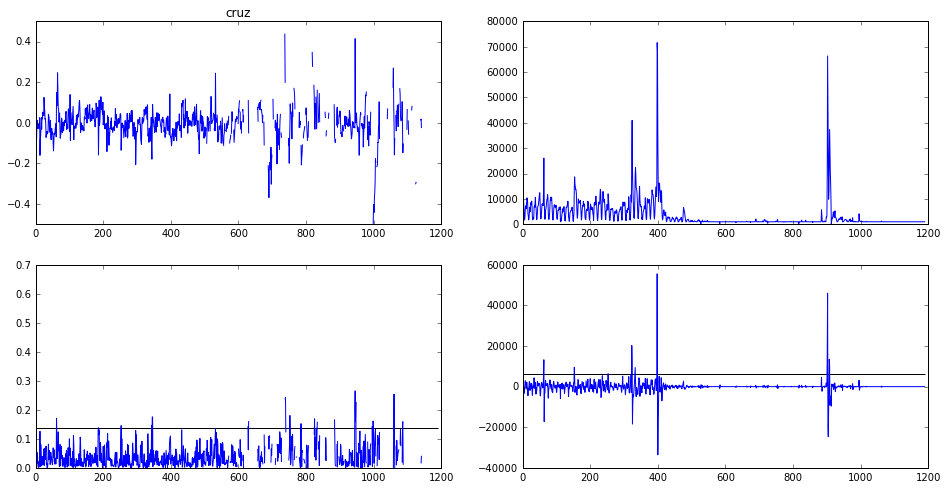

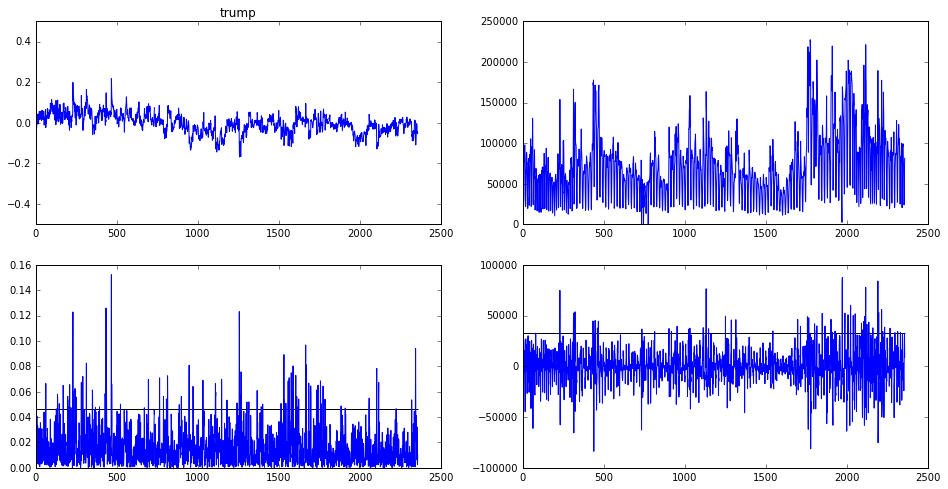

In [4]:
for candidate in candidates:
    conn = sqlite3.connect('../data backup/data_downsampled.sqlite')
    c = conn.cursor()
    c.execute('''SELECT * FROM '''+candidate+''' WHERE datetime > 1459456469;''')
    rows = c.fetchall()
    conn.close()
    
    rows = np.array(rows).astype(np.float32)
    
    # calculate derivative of sentiment and tweets per bin
    data_diff = rows.copy()
    data_diff[:,1] = np.abs(diff_smooth(rows[:,1], 2))
    data_diff[:,2] = diff_smooth(rows[:,2], 1)

    # get peaks above a threshold
#     sentiment_diff_threshold = np.std(data_diff[:,1])*1.5
#     tps_diff_threshold = np.std(data_diff[:,2])*1.5
#     sentiment_diff_peaks = get_peaks(data_diff[:,[0,1]], sentiment_diff_threshold)
#     tps_diff_peaks = get_peaks(data_diff[:,[0,2]], tps_diff_threshold)
    
    plt.figure(figsize=(16,8))
    plt.subplot(221)
    plt.title(candidate)
    plt.plot(rows[:,1])
    plt.ylim([-0.5,0.5])
    plt.subplot(222)
    plt.plot(rows[:,2])
    plt.subplot(223)
    plt.plot(data_diff[:,1])
    plt.hlines(np.nanstd(data_diff[:,1])*3, 0, len(data_diff[:,1]))
    plt.subplot(224)
    plt.plot(data_diff[:,2])
    plt.hlines(np.nanstd(data_diff[:,2])*2, 0, len(data_diff[:,2]))
    plt.show()

In [168]:
conn = sqlite3.connect('../data backup/data_downsampled.sqlite')
c = conn.cursor()
c.execute('''SELECT * FROM trump WHERE datetime > 1459456469;''')
rows = c.fetchall()
conn.close()
rows = np.array(rows).astype(np.float32)

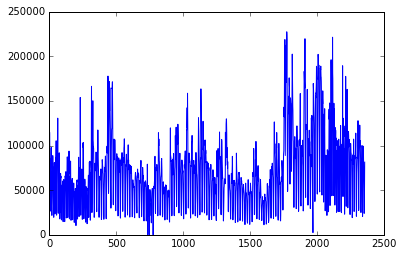

In [169]:
plt.plot(rows[:,2])

In [170]:
data = rows[:,2]

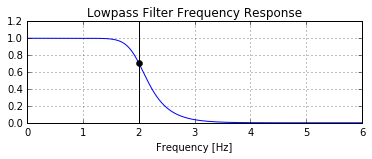

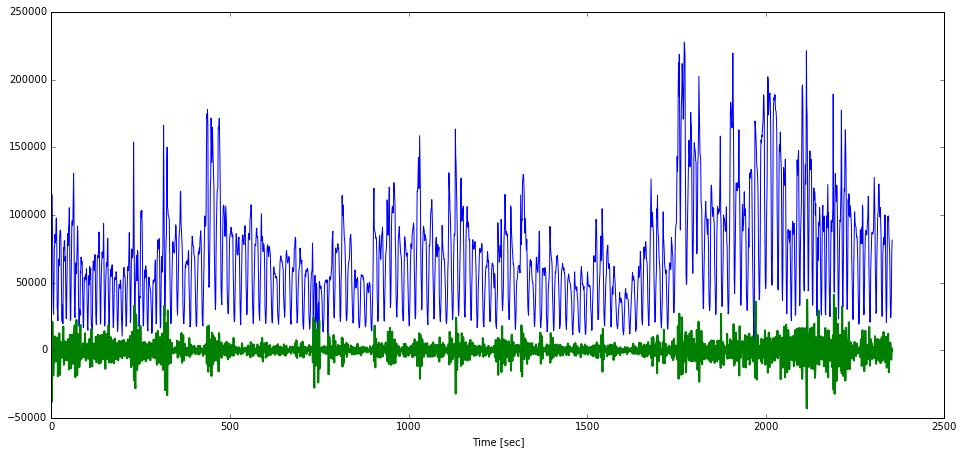

In [267]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 12       # sample rate, per day
cutoff = 2  # desired cutoff frequency of the filter, per day

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
# T = 5.0         # seconds
# n = int(T * fs) # total number of samples
# t = np.linspace(0, T, n, endpoint=False)
# # "Noisy" data.  We want to recover the 1.2 Hz signal from this.
# data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_highpass_filter(data, cutoff, fs, order)

plt.figure(figsize=(16,16))
plt.subplot(2, 1, 2)
plt.plot(data, 'b-', label='data')
plt.plot(y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')

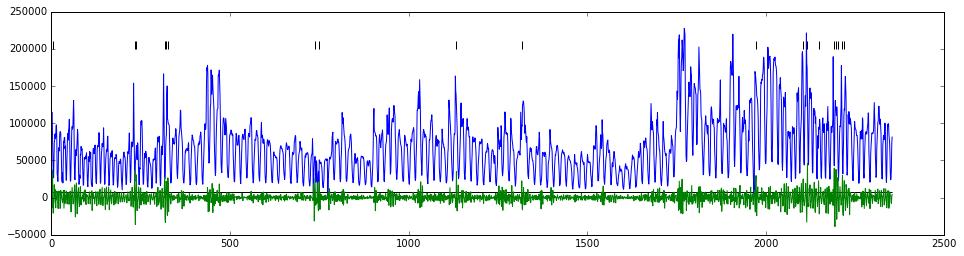

In [272]:
plt.figure(figsize=(16,4))
plt.plot(data)
plt.plot(y)
plt.hlines(np.std(y),0,y.size)
plt.vlines(np.where(y > np.std(y)*3),2e5,2.1e5)

In [202]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

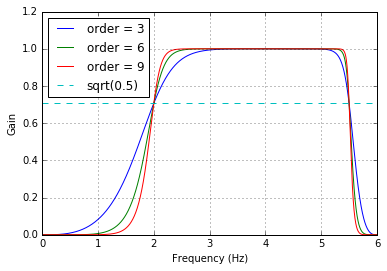

In [270]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 12
lowcut = 2
highcut = 5.5

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

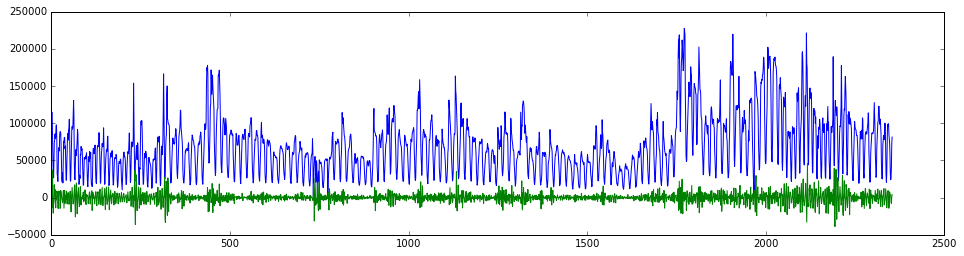

In [271]:
y = butter_bandpass_filter(data, lowcut, highcut, fs, order=6)
plt.figure(figsize=(16,4))
plt.plot(data)
plt.plot(y)

<hr>

In [291]:
data = rows[:,2]

In [296]:
y = np.zeros_like(data)
window_size = 12
for i in range(data.size - window_size):
    y[i+window_size] = data[i+window_size] - data[i]

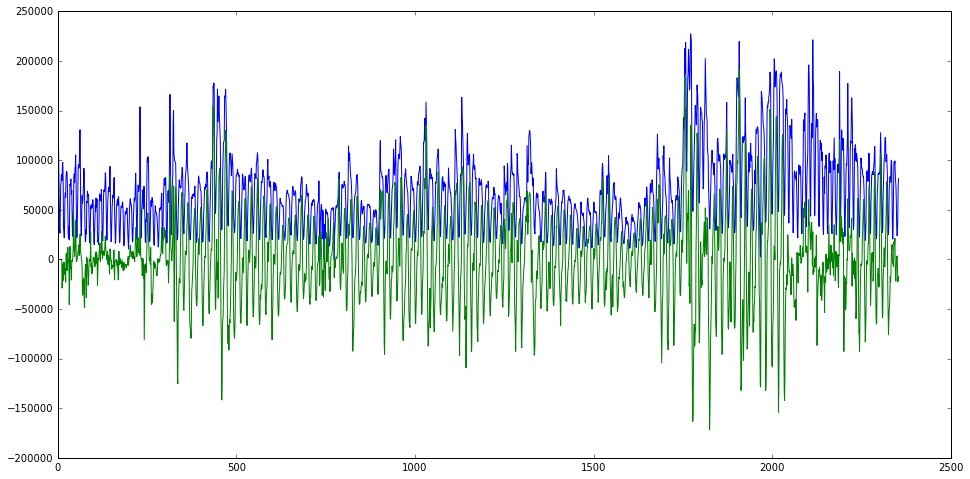

In [299]:
plt.figure(figsize=(16,8))
plt.plot(data)
plt.plot(y)

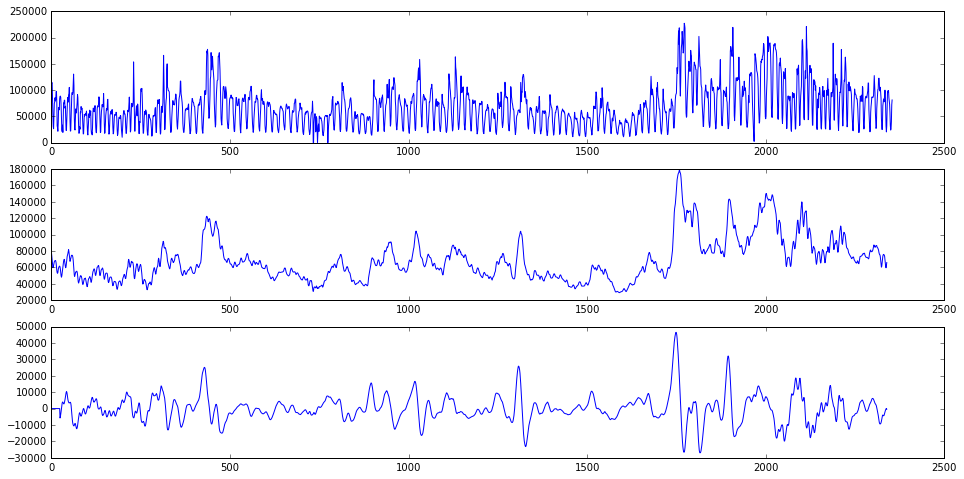

In [318]:
N = 16
y = np.convolve(data, np.ones((N,))/N, mode='valid')

f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(16,8))
ax1.plot(data)
ax2.plot(y)
ax3.plot(diff_smooth(y,N))

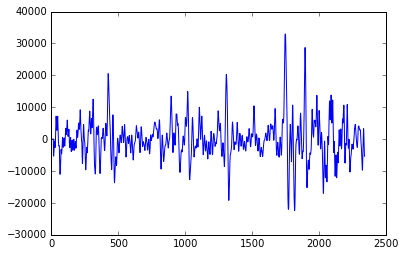

In [313]:
def diff_smooth(x, n):
    a = np.zeros_like(x)
    for i in range(int(round(n/2)),len(x)-n):
        i += n
        a[i] = np.nanmean(x[i-int(round(n/2)):i+int(round(n/2))], axis=0) - np.nanmean(x[i-n:i], axis=0)
    return a

plt.plot(diff_smooth(y, 10))